In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt

In [79]:
df =pd.read_csv('clean_data.csv')
df.head()

,PULocationID,tpep_pickup_datetime,total_request
0,1,2022-11-01 07:00:00,3.0
1,1,2022-11-01 08:00:00,1.0
2,1,2022-11-01 09:00:00,0.0
3,1,2022-11-01 10:00:00,1.0
4,1,2022-11-01 11:00:00,1.0


In [80]:
df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])
df["day"] = df['tpep_pickup_datetime'].map(lambda x: x.day)
df["month"] = df['tpep_pickup_datetime'].map(lambda x: x.month)
df["year"] = df['tpep_pickup_datetime'].map(lambda x: x.year)
df["hour"] = df['tpep_pickup_datetime'].map(lambda x: x.hour)
df['weekday_name'] =df['tpep_pickup_datetime'].map(lambda x: x.day_name())
df.head()

,PULocationID,tpep_pickup_datetime,total_request,day,month,year,hour,weekday_name
0,1,2022-11-01 07:00:00,3.0,1,11,2022,7,Tuesday
1,1,2022-11-01 08:00:00,1.0,1,11,2022,8,Tuesday
2,1,2022-11-01 09:00:00,0.0,1,11,2022,9,Tuesday
3,1,2022-11-01 10:00:00,1.0,1,11,2022,10,Tuesday
4,1,2022-11-01 11:00:00,1.0,1,11,2022,11,Tuesday


In [81]:
def time_plot(id):
    title="Run plot for location id: "+str(id)
    df[df['PULocationID']==id].plot('tpep_pickup_datetime','total_request',title=title)
    

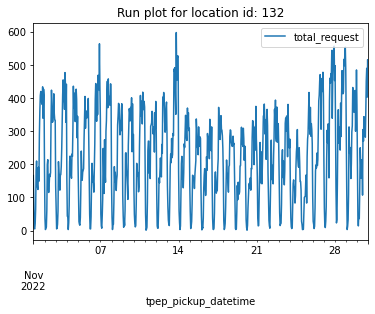

In [82]:
time_plot(132)

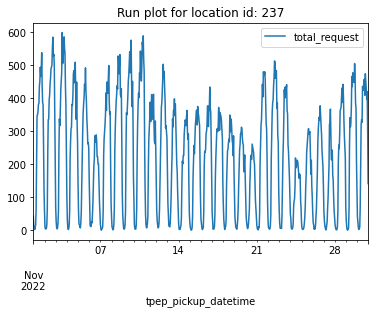

In [83]:
time_plot(237)

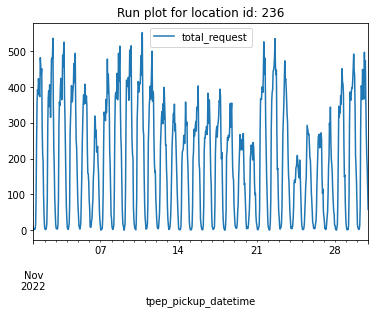

In [84]:
time_plot(236)

In [85]:
import statsmodels.api as sms
from statsmodels.tsa.stattools import adfuller

In [86]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [87]:
adf_test( df[df['PULocationID']==132]['total_request'])

ADF Statistics: -2.424355669423618
p- value: 0.1349798586633666
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [88]:
adf_test( df[df['PULocationID']==236]['total_request'])

ADF Statistics: -2.394593153649011
p- value: 0.1432682700514794
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [89]:
adf_test( df[df['PULocationID']==237]['total_request'])

ADF Statistics: -2.253052461679182
p- value: 0.18755657879838056
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


<AxesSubplot:xlabel='weekday_name', ylabel='Total request'>

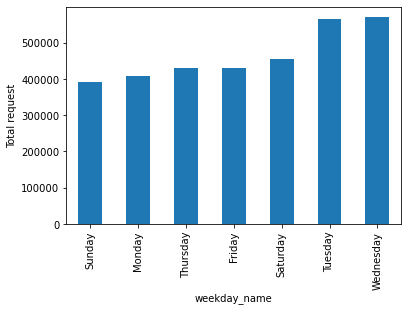

In [90]:
df.groupby('weekday_name')['total_request'].sum().sort_values().plot(kind='bar',ylabel="Total request")

<AxesSubplot:xlabel='hour', ylabel='Total request'>

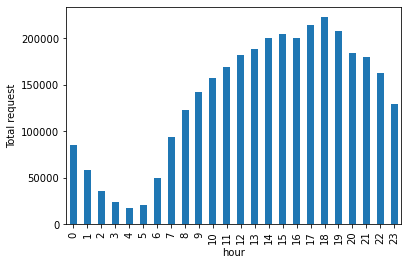

In [91]:
df.groupby('hour')['total_request'].sum().plot(kind='bar',ylabel="Total request")

In [92]:
def plot_weekday(df,id):
    title="Request in each day of the week for location id: "+str(id)
    df=df[df['PULocationID']==id]
    df.groupby('weekday_name')['total_request'].sum().sort_values().plot(kind='bar',ylabel="Total request",title=title)

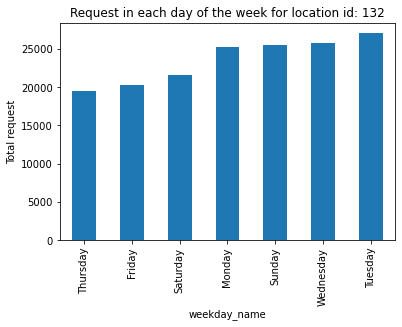

In [93]:
plot_weekday(df,132)

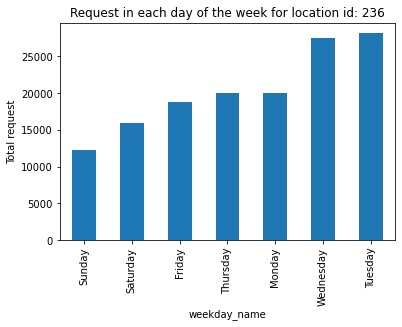

In [94]:
plot_weekday(df,236)

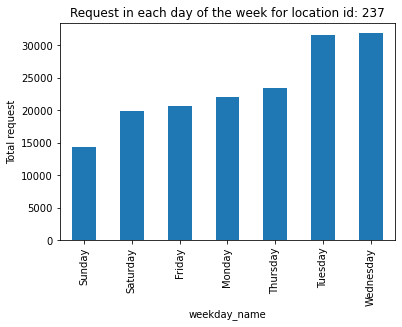

In [95]:
plot_weekday(df,237)

In [96]:
def plot_hourly(df,id):
    title="Request in each hour for location id: "+str(id)
    df=df[df['PULocationID']==id]
    df.groupby('hour')['total_request'].sum().plot(kind='bar',ylabel="Total request",title=title)

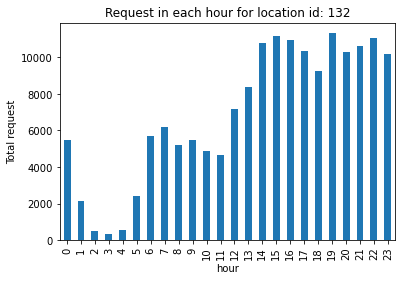

In [97]:
plot_hourly(df,132)

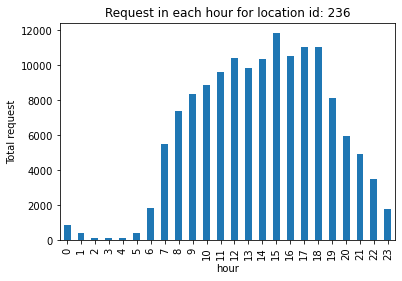

In [98]:
plot_hourly(df,236)

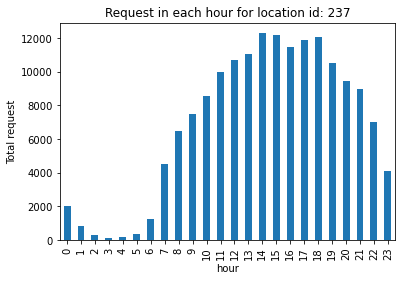

In [99]:
plot_hourly(df,237)

In [101]:
df[df['PULocationID']==237]

,PULocationID,tpep_pickup_datetime,total_request,day,month,year,hour,weekday_name,total_request_shift
154508,237,2022-11-01 00:00:00,42.0,1,11,2022,0,Tuesday,58.0
154509,237,2022-11-01 01:00:00,13.0,1,11,2022,1,Tuesday,42.0
154510,237,2022-11-01 02:00:00,9.0,1,11,2022,2,Tuesday,13.0
154511,237,2022-11-01 03:00:00,2.0,1,11,2022,3,Tuesday,9.0
154512,237,2022-11-01 04:00:00,8.0,1,11,2022,4,Tuesday,2.0
...,...,...,...,...,...,...,...,...,...
155223,237,2022-11-30 19:00:00,427.0,30,11,2022,19,Wednesday,450.0
155224,237,2022-11-30 20:00:00,396.0,30,11,2022,20,Wednesday,427.0
155225,237,2022-11-30 21:00:00,420.0,30,11,2022,21,Wednesday,396.0
155226,237,2022-11-30 22:00:00,296.0,30,11,2022,22,Wednesday,420.0


In [102]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

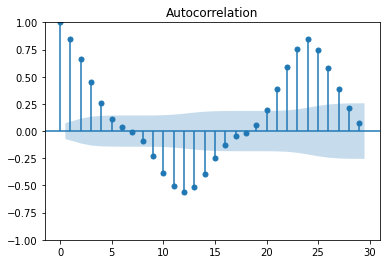

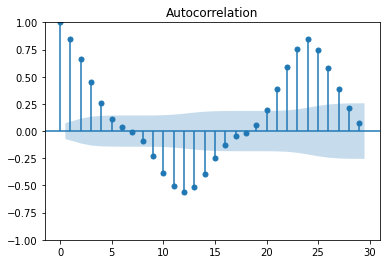

In [103]:
plot_acf(df[df['PULocationID']==132]['total_request'])

C:\Users\deepa\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


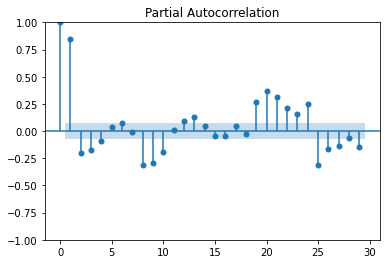

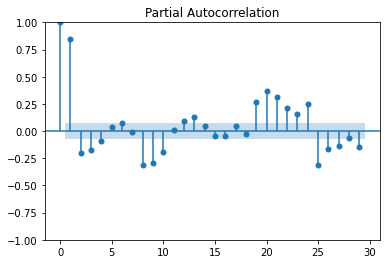

In [104]:
plot_pacf(df[df['PULocationID']==132]['total_request'])

In [105]:
df['total_request_shift']=df['total_request'].shift(1)

In [106]:
df['first_diff']=df['total_request']-df['total_request_shift']

In [112]:
adf_test( df[df['PULocationID']==132]['first_diff'].dropna())

ADF Statistics: -20.97510158506209
p- value: 0.0
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [114]:
adf_test( df[df['PULocationID']==236]['first_diff'].dropna())

ADF Statistics: -15.516401546417448
p- value: 2.313303163151313e-28
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [115]:
adf_test( df[df['PULocationID']==237]['first_diff'].dropna())

ADF Statistics: -17.226507826786357
p- value: 6.2317683703540524e-30
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


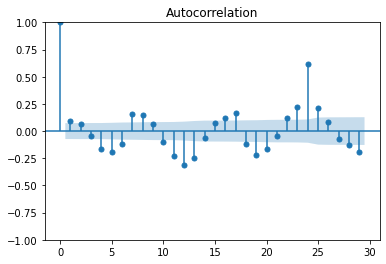

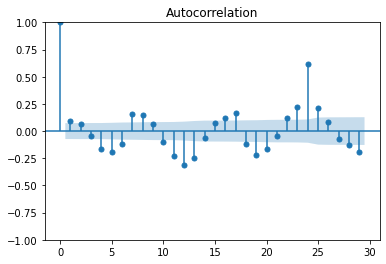

In [116]:
plot_acf(df[df['PULocationID']==132]['first_diff'].dropna())

C:\Users\deepa\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


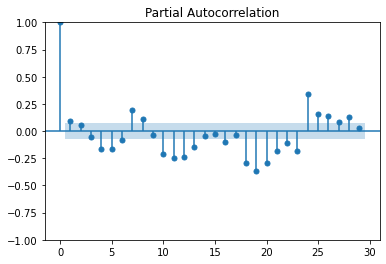

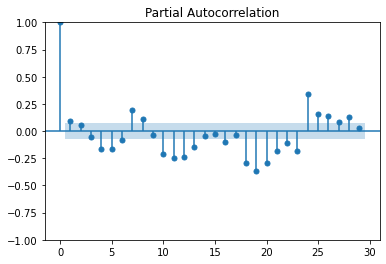

In [117]:
plot_pacf(df[df['PULocationID']==132]['first_diff'].dropna())

In [190]:
train_data=df[df['PULocationID']==132].sort_values(by='tpep_pickup_datetime')['total_request'][:540]
test_data=df[df['PULocationID']==132].sort_values(by='tpep_pickup_datetime')['total_request'][540:]

In [191]:
import statsmodels.api as sm
model_ARIMA=sm.tsa.arima.ARIMA(train_data,order=(1,1,0))


C:\Users\deepa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\deepa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\deepa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [192]:
model_Arima_fit=model_ARIMA.fit()

In [193]:
pred=model_Arima_fit.predict(start=540,end=719)
residuals=np.array(test_data)-np.array(pred)

C:\Users\deepa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<AxesSubplot:ylabel='Count'>

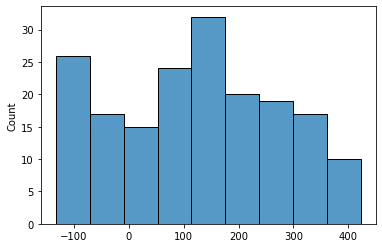

In [194]:
sns.histplot(data=residuals)

In [195]:
test_df=df[df['PULocationID']==132][['tpep_pickup_datetime','total_request']].sort_values(by='tpep_pickup_datetime')[540:].reset_index(drop=True)

In [196]:
test_df['Predicted_ARIMA']=pred.reset_index(drop=True)

In [197]:
test_df.head()

,tpep_pickup_datetime,total_request,Predicted_ARIMA
0,2022-11-23 12:00:00,180.0,135.224756
1,2022-11-23 13:00:00,324.0,134.939497
2,2022-11-23 14:00:00,340.0,134.910176
3,2022-11-23 15:00:00,300.0,134.907162
4,2022-11-23 16:00:00,346.0,134.906853


<AxesSubplot:xlabel='tpep_pickup_datetime'>

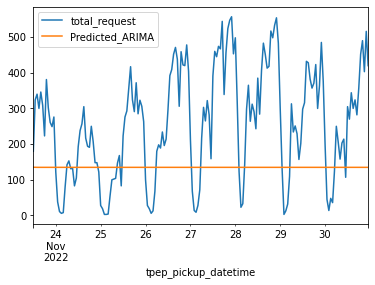

In [198]:
test_df.set_index('tpep_pickup_datetime')[['total_request','Predicted_ARIMA']].plot()

In [200]:
test_df

,tpep_pickup_datetime,total_request,Predicted_ARIMA
0,2022-11-23 12:00:00,180.0,135.224756
1,2022-11-23 13:00:00,324.0,134.939497
2,2022-11-23 14:00:00,340.0,134.910176
3,2022-11-23 15:00:00,300.0,134.907162
4,2022-11-23 16:00:00,346.0,134.906853
...,...,...,...
175,2022-11-30 19:00:00,452.0,134.906817
176,2022-11-30 20:00:00,490.0,134.906817
177,2022-11-30 21:00:00,403.0,134.906817
178,2022-11-30 22:00:00,516.0,134.906817


In [201]:
import math 
MSE = np.square(np.subtract(test_df['total_request'],test_df['Predicted_ARIMA'])).mean()  
rmse= math.sqrt(MSE)
print(rmse)

196.16453148118984


In [202]:
test_df.head()

,tpep_pickup_datetime,total_request,Predicted_ARIMA
0,2022-11-23 12:00:00,180.0,135.224756
1,2022-11-23 13:00:00,324.0,134.939497
2,2022-11-23 14:00:00,340.0,134.910176
3,2022-11-23 15:00:00,300.0,134.907162
4,2022-11-23 16:00:00,346.0,134.906853


In [203]:
def naive_forecast(series):
    return series.iloc[-1] 

In [204]:
test_df['naive']=naive_forecast(train_data)
test_df.head()

,tpep_pickup_datetime,total_request,Predicted_ARIMA,naive
0,2022-11-23 12:00:00,180.0,135.224756,138.0
1,2022-11-23 13:00:00,324.0,134.939497,138.0
2,2022-11-23 14:00:00,340.0,134.910176,138.0
3,2022-11-23 15:00:00,300.0,134.907162,138.0
4,2022-11-23 16:00:00,346.0,134.906853,138.0


<AxesSubplot:xlabel='tpep_pickup_datetime'>

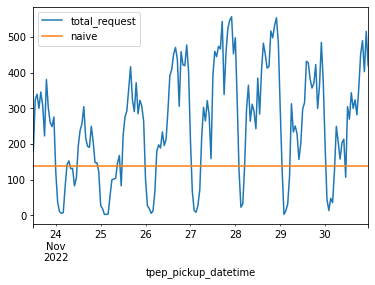

In [205]:
test_df.set_index('tpep_pickup_datetime')[['total_request','naive']].plot()

In [206]:
MSE = np.square(np.subtract(test_df['total_request'],test_df['naive'])).mean()  
rmse= math.sqrt(MSE)
print(rmse)

194.2400719613632
